## Моделирование молекулярной динамики

   - Система: 686 равномерно распределенных частиц в кубике $12.25\times12.25\times12.25$;
   - Потенциал взаимодействия: Леннард-Джонс;
   - Начальная температура: $T_i = 1.5~\varepsilon / k_B$;
   - Ансамбль: NVE;
   - Толщина сферического слоя (список Верле): $\Delta r_s = 0.3~\sigma $;
   - Временной шаг: $\Delta t = 0.005~\tau$;
   - Число "неравновесных" итераций: 10000;
   - Характеристики системы рассчитывалась через каждые 10000 шагов;
   - Подсчёт состоял из 5499 шагов: 500 на уравновешивание системы при фиксированной температуре и 5999 на усреднение по ансамблям (к первому ансамблю относятся шаги с 1 по 3000 шаг, ко второму - с 2 по 3001 и т.д.);
   - Функция радиального распределения вычислялась как среднее по времени за первые 3000 шагов;

#### Импорт необходимых библиотек

In [1]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append(os.path.dirname(sys.path[0]))

import scripts.constants as con
from scripts.postprocessing import PostProcessor

#### Настройки графиков

In [2]:
plt.style.use('seaborn')
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['figure.figsize'] = [i / 2.54 for i in (15, 15)]
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['mathtext.it'] = 'Times New Roman'
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['axes.labelsize'] = 14

#### Путь к файлам с данными

In [3]:
CURRENT_DATA = '2021-05-04'
PLOT_FILENAME_POSTFIX = 'nve'

In [4]:
PATH_TO_CURRENT_DATA = os.path.join(con.PATH_TO_DATA, CURRENT_DATA)
PATH_TO_CURRENT_PLOTS = os.path.join(con.PATH_TO_PLOTS, CURRENT_DATA)

#### Параметры, при которых были подчитаны функции радиального распределения, среднеквадратичные смещения и т.д.

In [5]:
setups = []
for filename in os.listdir(PATH_TO_CURRENT_DATA):
    if filename.startswith('rdf'):
        parts = filename.split('_')
        setup = {
            'temperature': float(parts[2]), 
            'pressure': float(parts[4]), 
            'heating_velocity': float(parts[6]) if 'HV' in parts else None,
            
        }
        setups.append(setup)
        
setups

[{'temperature': 1.49962, 'pressure': -0.00408, 'heating_velocity': None},
 {'temperature': 1.56756, 'pressure': 0.44655, 'heating_velocity': None}]

#### Извлечение значений функции радиального распределения из файлов

In [6]:
pp = PostProcessor(
    path_to_data=PATH_TO_CURRENT_DATA, 
    path_to_plots=PATH_TO_CURRENT_PLOTS, 
    plot_filename_postfix=PLOT_FILENAME_POSTFIX, 
    setups=setups,
)
pp.msd.data

,time,setup_0,setup_1
0,0.005,0.000000,0.000000
1,0.010,0.000116,0.000116
2,0.015,0.000462,0.000463
3,0.020,0.001039,0.001040
4,0.025,0.001844,0.001847
...,...,...,...
2995,14.980,43.157330,44.292835
2996,14.985,43.172490,44.308870
2997,14.990,43.187595,44.324990
2998,14.995,43.202793,44.340973


#### Графики функций радиального распределения $g(\textbf{r})$ при различных температурах

$$g(\textbf{r})=\dfrac{V}{N^2}\left<\sum_{i}{\sum_{j\ne i}{\delta(\textbf{r}-\textbf{r}_{ij})}}\right>$$

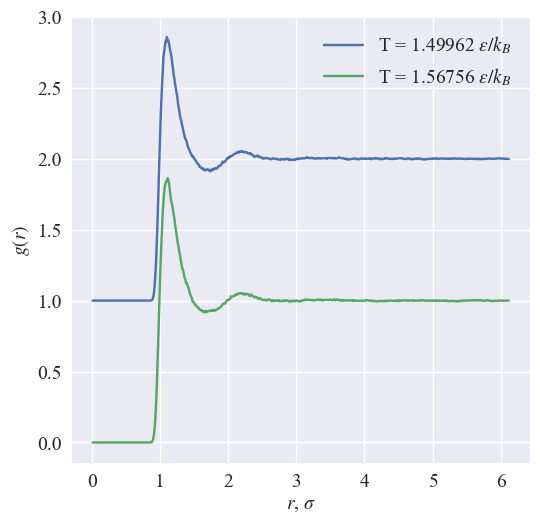

In [7]:
pp.plot_rdf(
#     left=0,
#     right=6.125,
#     bottom=0, 
#     top=8,
)

#### Временная зависимость среднеквадратичного смещения $\left<\Delta r^2(t)\right>$ при различных температурах

$$\left<\Delta r^2(t)\right>=\dfrac{1}{N}\sum_{i=1}^{N}{\left|\textbf{r}_i(t)-\textbf{r}_i(0)\right|^2}$$

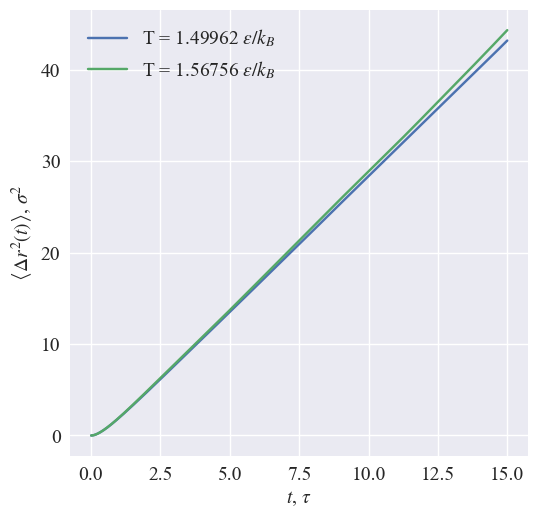

In [8]:
pp.plot_msd(
#     left=0,
#     right=5,
#     bottom=0, 
#     top=7,
)

#### Временная зависимость автокорреляционнной функции скорости $\Psi(t)$ при различных температурах

$$\Psi(t) = \dfrac{1}{N}\left<\sum_{j=1}^N{\vec{v}_j(t)\vec{v}_j(0)}\right>$$

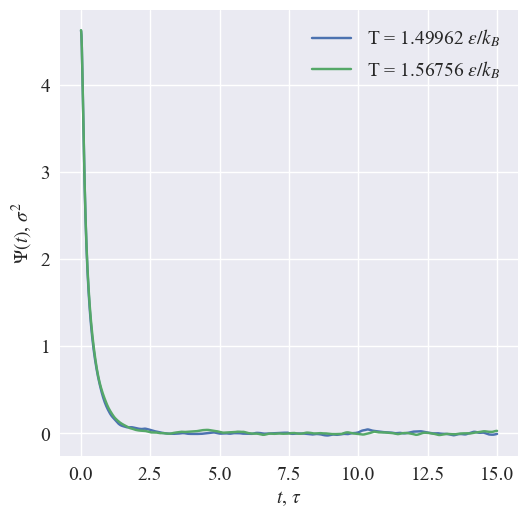

In [9]:
pp.plot_vaf(
#     left=0,
#     right=1,
#     bottom=0, 
#     top=20,
)

#### Временная зависимость коэффициента самодиффузии $D$, вычисленного через соотношение Эйнштейна, при различных температурах

$$D_E(t)=\dfrac{\left<\left<\Delta r^2\right>\right>}{6t}=\dfrac{1}{6tN}\left<\sum_{i=1}^{N}\left|\textbf{r}_i(t)-\textbf{r}_i(0)\right|^2\right>$$

$$D=\lim_{t\rightarrow\infty}{D_E(t)}$$

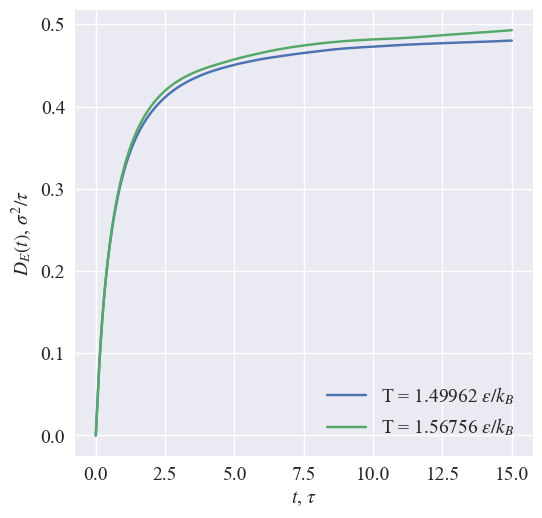

In [10]:
pp.plot_einstein_diffusion(
#     left=0,
#     right=8,
# #     bottom=0, 
#     top=0.25,
)

#### Временная зависимость коэффициента самодиффузии $D$, вычисленного через соотношение Грина-Кубо, при различных температурах

$$D_{GK}(t)=\dfrac{1}{3}\int_{0}^{t}{\Psi(\tau)d\tau}=\dfrac{1}{3N}\int_{0}^{t}{\left<\sum_{j=1}^N{\vec{v}_j(\tau)\vec{v}_j(0)}\right>d\tau}$$

$$D=\lim_{t\rightarrow\infty}{D_{GK}(t)}$$

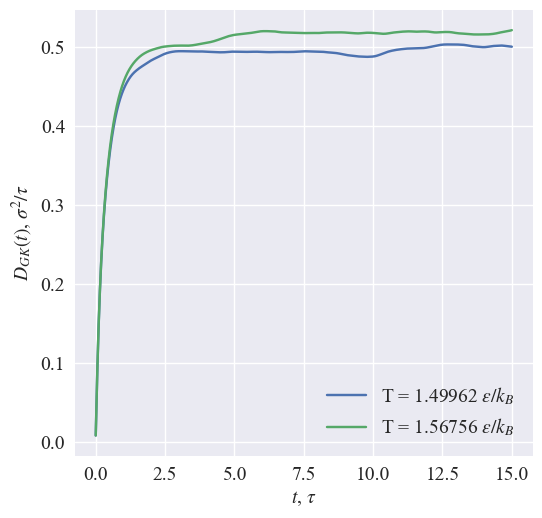

In [11]:
pp.plot_gk_diffusion(
#     left=0,
#     right=8,
# #     bottom=0, 
#     top=0.27,
)

#### Сравнение коэффициентов самодиффузии, вычисленных через соотношения Эйнштейна и Грина-Кубо

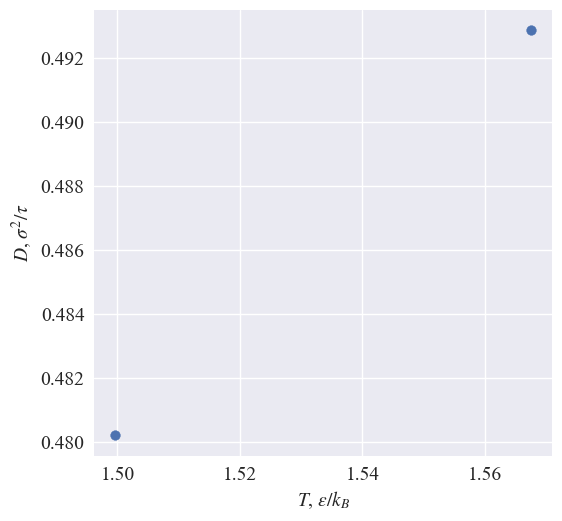

In [12]:
pp.plot_diffusion(
#     left=0, 
#     right=3,
#     bottom=0, 
#     top=0.1,
)

#### Извлечение параметров системы из файла

In [13]:
pp.system_parameters

,temperature,pressure,kinetic_energy,potential_energy,total_energy,virial,msd,diffusion,volume
0,1.50000,-0.00408,1543.1075,-1394.2632,148.84436,-3108.71220,0.0,0.0,1838.2656
1,1.49927,-0.00023,1542.0773,-1393.2428,148.83447,-3085.43480,0.0,0.0,1838.2656
2,1.49800,0.00551,1540.4366,-1391.6140,148.82263,-3050.48200,0.0,0.0,1838.2656
3,1.49608,0.01331,1538.0416,-1389.2375,148.80408,-3002.70200,0.0,0.0,1838.2656
4,1.49336,0.02316,1534.7220,-1385.9397,148.78235,-2941.73880,0.0,0.0,1838.2656
...,...,...,...,...,...,...,...,...,...
9995,1.57005,0.45116,1614.6130,-1465.6587,148.95435,-741.15210,0.0,0.0,1838.2656
9996,1.56967,0.44983,1614.0201,-1465.0427,148.97742,-747.30640,0.0,0.0,1838.2656
9997,1.56894,0.44884,1613.2712,-1464.2542,149.01709,-751.30396,0.0,0.0,1838.2656
9998,1.56826,0.44793,1612.8176,-1463.7834,149.03418,-755.40890,0.0,0.0,1838.2656


#### Зависимость температуры системы от времени

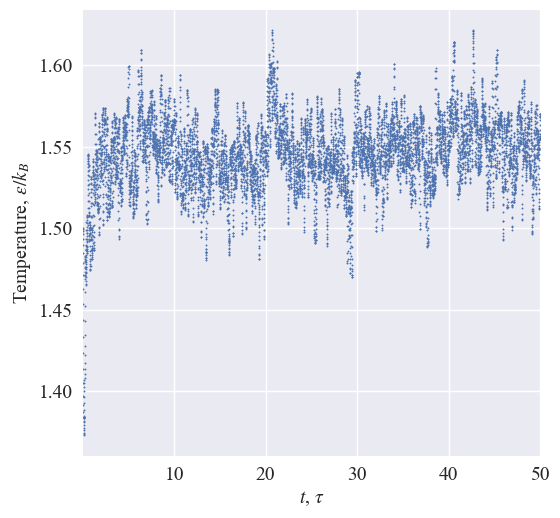

In [14]:
pp.plot_system_parameters(
    column_names=['temperature',],
    y_label=r'Temperature, $\epsilon / k_B$',
#     bottom=2.75,
#     top=3,
);

#### Зависимость давления системы от времени

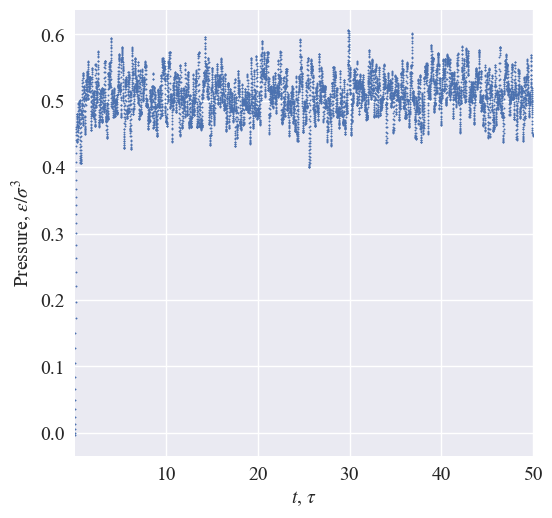

In [15]:
pp.plot_system_parameters(
    column_names=['pressure',],
    y_label=r'Pressure, $\epsilon / \sigma^3 $',
#     bottom=-1,
#     top=5,
);

#### Зависимость кинетической энергии системы от времени

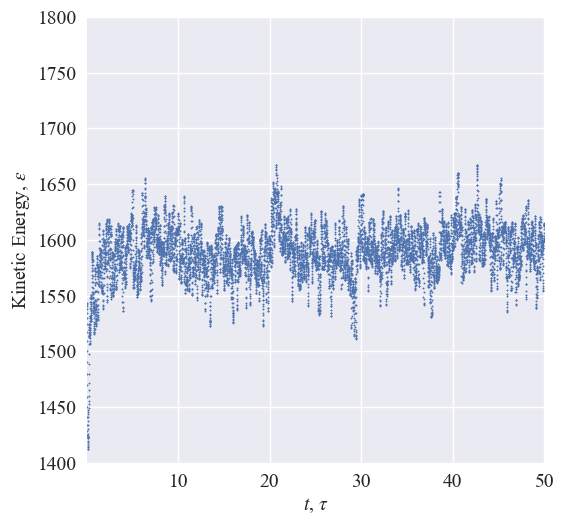

In [16]:
pp.plot_system_parameters(
    column_names=['kinetic_energy',],
    y_label=r'Kinetic Energy, $\epsilon$',
    bottom=1400,
    top=1800,
);

#### Зависимость потенциальной энергии системы от времени

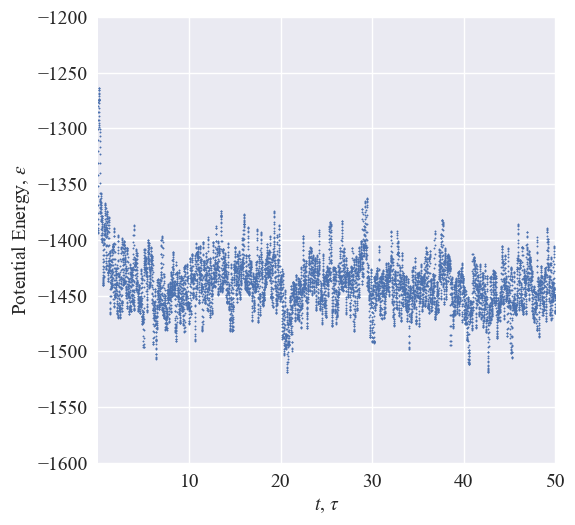

In [17]:
pp.plot_system_parameters(
    column_names=['potential_energy',],
    y_label=r'Potential Energy, $\epsilon$',
    bottom=-1600,
    top=-1200,
);

#### Зависимость полной энергии системы от времени

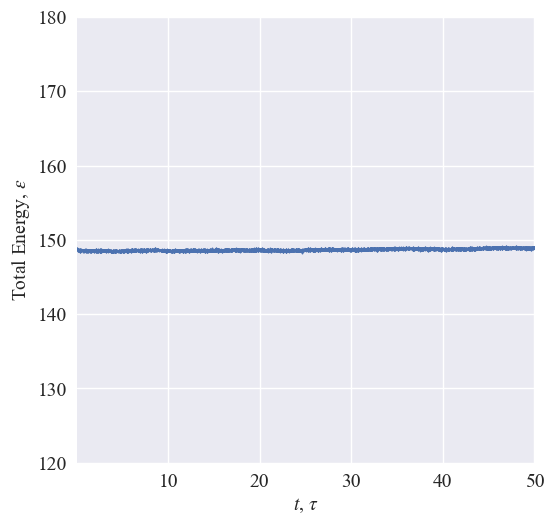

In [18]:
pp.plot_system_parameters(
    column_names=['total_energy',],
    y_label=r'Total Energy, $\epsilon$',
    bottom=120,
    top=180,
);

#### Энергии на одном графике

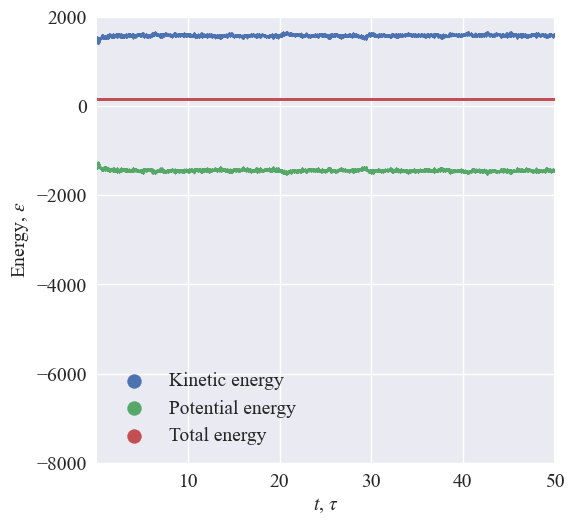

In [19]:
pp.plot_system_parameters(
    column_names=['kinetic_energy', 'potential_energy', 'total_energy'],
    y_label=r'Energy, $\epsilon$',
    bottom=-8000,
    top=2000,
);

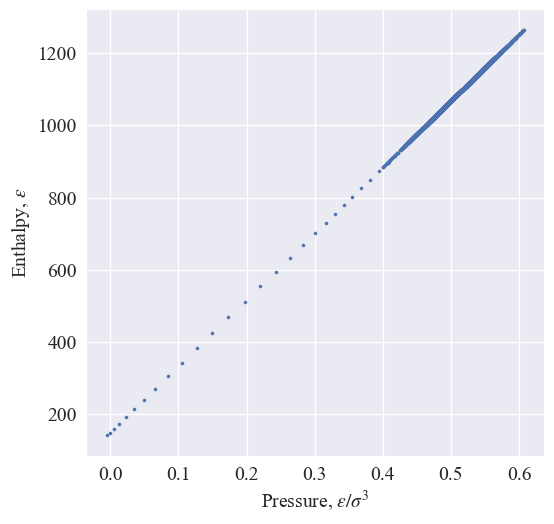

In [20]:
enthalpy = pp.get_enthalpy()

plt.scatter(pp.system_parameters['pressure'], enthalpy, s=5);
plt.xlabel(r'Pressure, $\epsilon / \sigma^3 $',)
plt.ylabel(r'Enthalpy, $\epsilon$',)

plt.show();

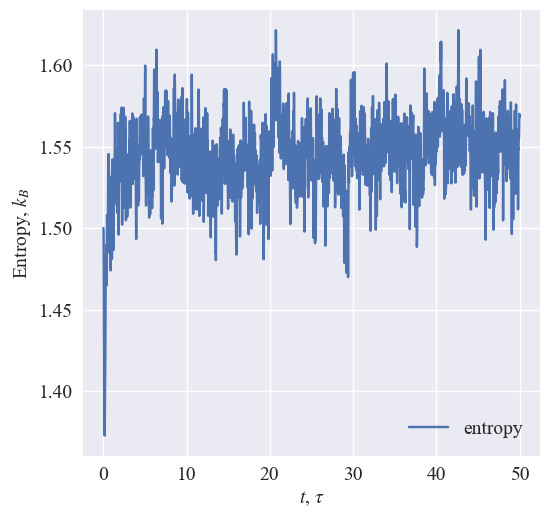

In [21]:
times = (pp.system_parameters.index + 1) * 0.005

pp.system_parameters['entropy'] = pp.get_entropy()

plt.plot(times, pp.system_parameters['entropy'], label='entropy');
plt.xlabel(r'$t$, $\tau$')
plt.ylabel(r'Entropy, $k_B$',)
# plt.xlim(
#     left=0,
#     right=45,
# );
# plt.ylim(
#     top=500,
#     bottom=-50000,
# );
plt.legend();

In [22]:
pp.get_free_energy()
pp.get_gibbs_energy()

0       141.344236
1       148.421559
2       158.973195
3       173.311639
4       191.418482
           ...    
9995    978.205301
9996    975.760433
9997    973.940607
9998    972.267857
9999    969.731070
Name: gibbs_energy, Length: 10000, dtype: float64

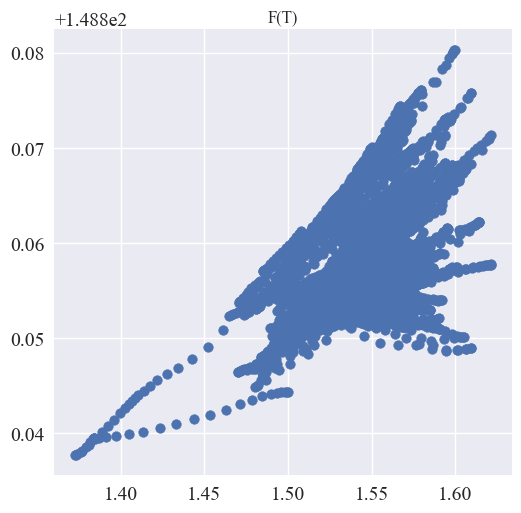

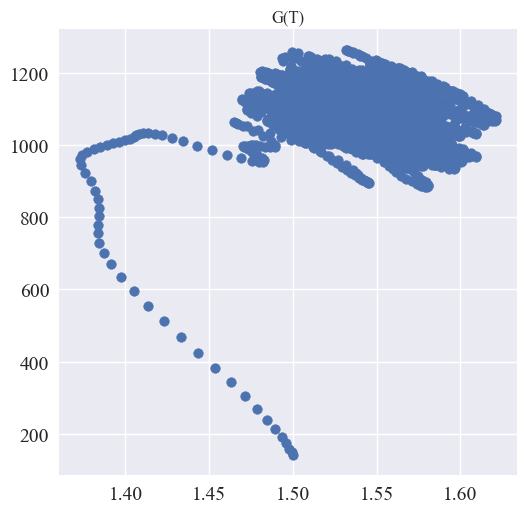

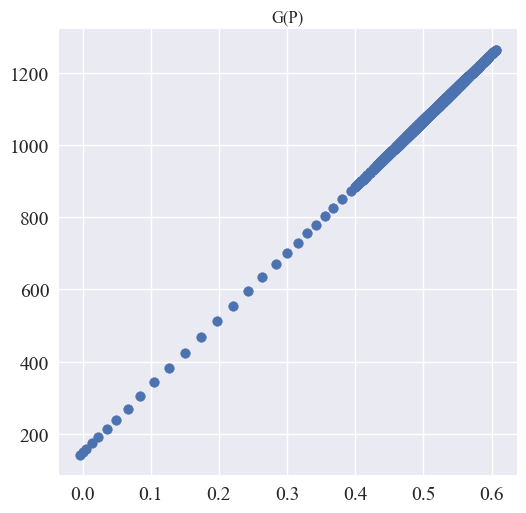

In [23]:
plt.scatter(
    pp.system_parameters['temperature'],
    pp.system_parameters['free_energy'],
);
plt.title('F(T)');
plt.show();

plt.scatter(
    pp.system_parameters['temperature'],
    pp.system_parameters['gibbs_energy'],
);
plt.title('G(T)');
plt.show();

plt.scatter(
    pp.system_parameters['pressure'],
    pp.system_parameters['gibbs_energy'],
);
plt.title('G(P)');
plt.show();